 ## Group 1- Hanyue ‘Patrick’ Yao, Rohit Desai, Yajur Sehra

 Machine Learning Final Project - Media Campaign Cost Prediction for Convenient Food Mart


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset and figuring out basic information

df=pd.read_csv('train_dataset.csv')

print('Shape of dataset:\n',f'Rows:{df.shape[0]}\t',f'Columns:{df.shape[1]}')
df.head()

Shape of dataset:
 Rows:51363	 Columns:16


,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79


In [3]:
# checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51363 entries, 0 to 51362
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    51363 non-null  float64
 1   unit_sales(in millions)     51363 non-null  float64
 2   total_children              51363 non-null  float64
 3   num_children_at_home        51363 non-null  float64
 4   avg_cars_at home(approx).1  51363 non-null  float64
 5   gross_weight                51363 non-null  float64
 6   recyclable_package          51363 non-null  float64
 7   low_fat                     51363 non-null  float64
 8   units_per_case              51363 non-null  float64
 9   store_sqft                  51363 non-null  float64
 10  coffee_bar                  51363 non-null  float64
 11  video_store                 51363 non-null  float64
 12  salad_bar                   51363 non-null  float64
 13  prepared_food               513

In [4]:
# basic statistics 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),51363.0,6.531792,3.464902,0.51,3.80,5.94,8.64,22.92
unit_sales(in millions),51363.0,3.091194,0.827293,1.00,3.00,3.00,4.00,6.00
total_children,51363.0,2.538111,1.489316,0.00,1.00,3.00,4.00,5.00
num_children_at_home,51363.0,0.832019,1.303775,0.00,0.00,0.00,1.00,5.00
avg_cars_at home(approx).1,51363.0,2.199424,1.109080,0.00,1.00,2.00,3.00,4.00
gross_weight,51363.0,13.805512,4.622431,6.00,9.70,13.60,17.70,21.90
recyclable_package,51363.0,0.558437,0.496578,0.00,0.00,1.00,1.00,1.00
low_fat,51363.0,0.351148,0.477334,0.00,0.00,0.00,1.00,1.00
units_per_case,51363.0,18.856550,10.263746,1.00,10.00,19.00,28.00,36.00
store_sqft,51363.0,27979.153593,5701.145280,20319.00,23593.00,27694.00,30797.00,39696.00


In [5]:
# checking for NAs
df.isna().sum()

store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

There are no NA values in the dataset.

## EDA

Text(0.5, 1.0, 'Boxplot of Unit Sales(in millions)')

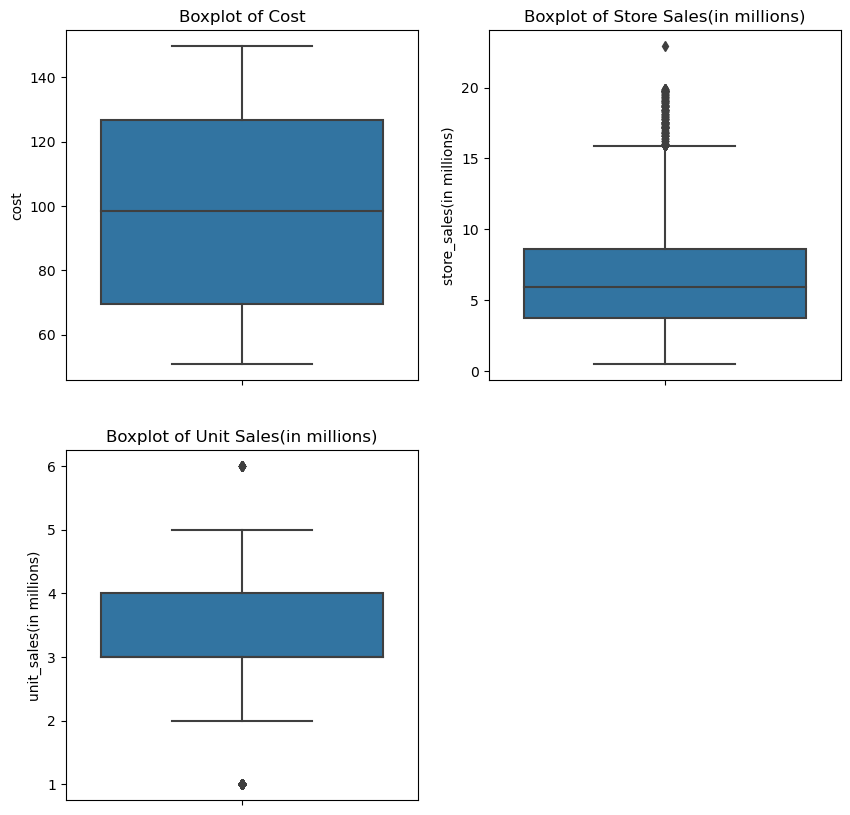

In [6]:
# boxplots to understand distributions
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data=df,y='cost')
plt.title('Boxplot of Cost')

plt.subplot(2,2,2)
sns.boxplot(data=df,y='store_sales(in millions)')
plt.title('Boxplot of Store Sales(in millions)')

plt.subplot(2,2,3)
sns.boxplot(data=df,y='unit_sales(in millions)')
plt.title('Boxplot of Unit Sales(in millions)')


Cost Variable has a median valeu of about 100 and doesn't contain outliers

Store sales has a median value of about 5 million and does conatin outliers

Unit sales does contain outliers.

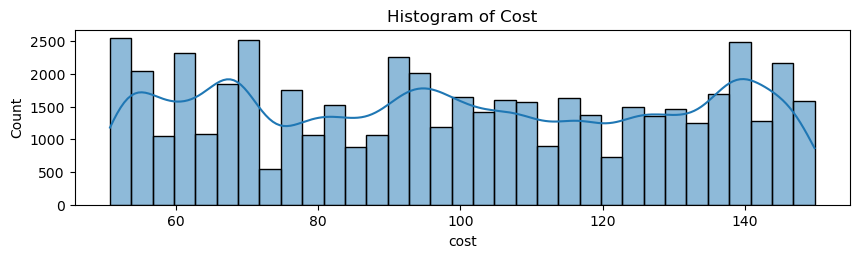

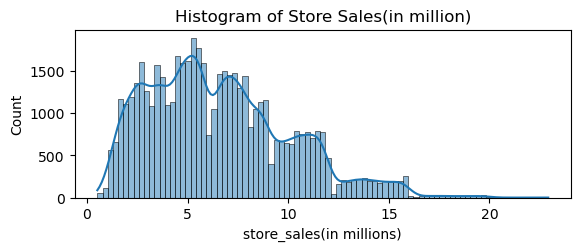

In [79]:
# distributions of Cost and Store Sales
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.histplot(data=df,x='cost',kde=True)
plt.title('Histogram of Cost')
plt.show()

plt.subplot(2,1,2)
sns.histplot(data=df,x='store_sales(in millions)',kde=True)
plt.title('Histogram of Store Sales(in million)')
plt.show()

Cost doesn't seem to be normally distributed and is not skewed.

Store sales doesn't seem to follow a normal distribution and is right skewed 

Text(0.5, 1.0, 'Average Cost by number of Cars at home')

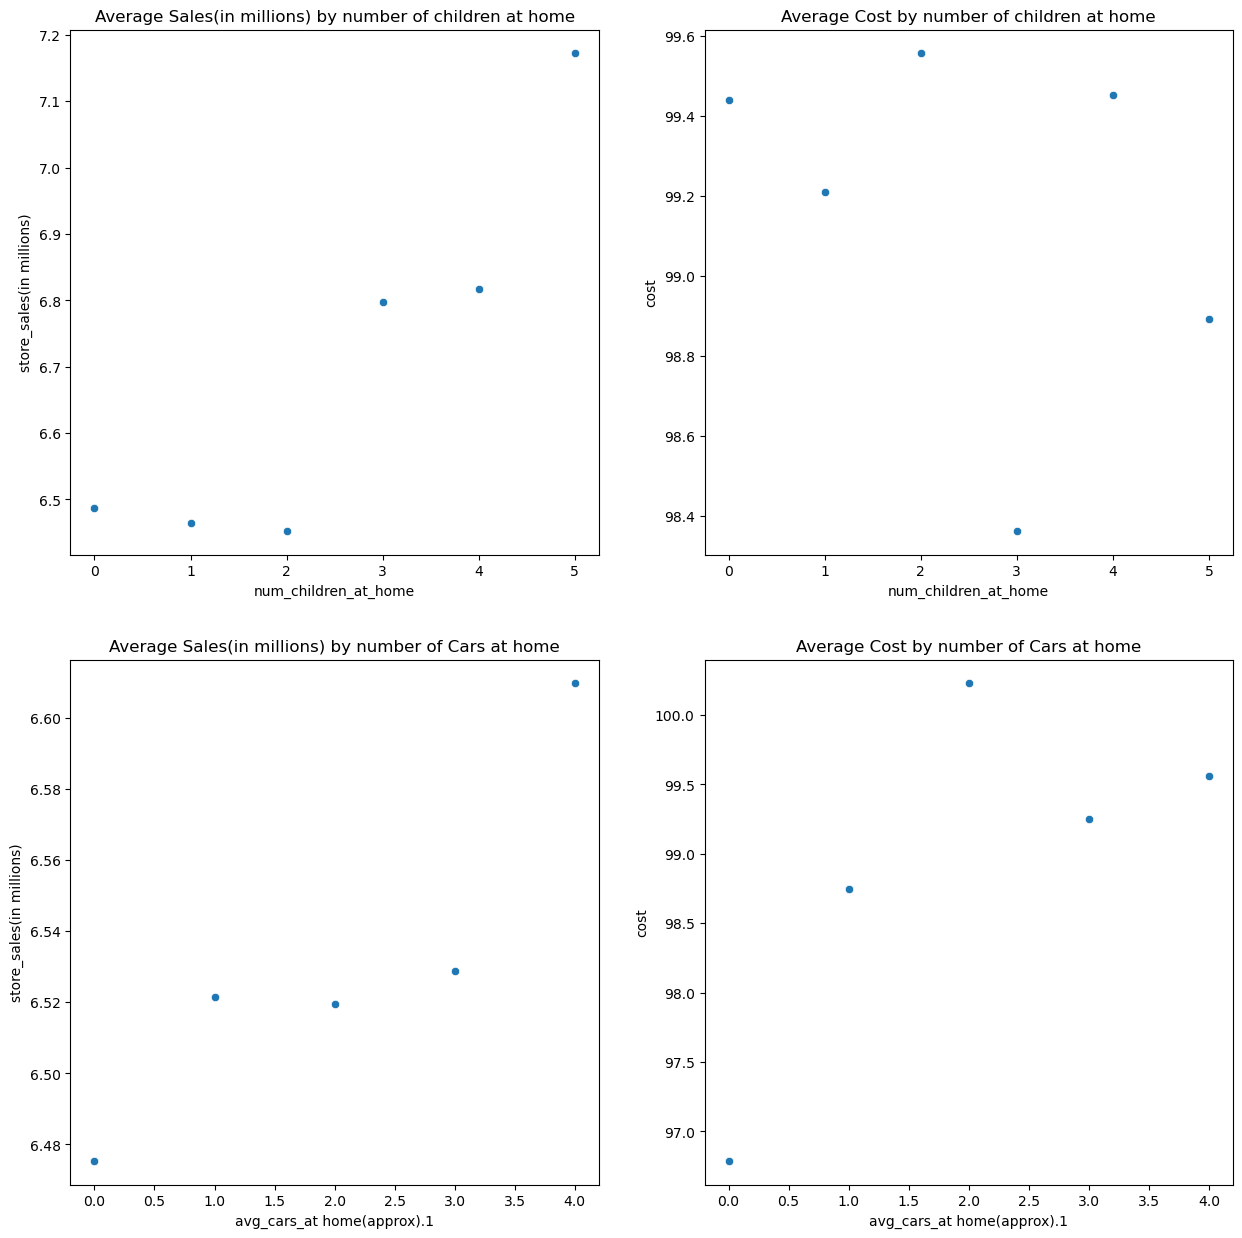

In [7]:
# average sales and cost based on number of children at home
avg_sales_children=df.groupby('num_children_at_home')['store_sales(in millions)'].mean()
avg_cost_children=df.groupby('num_children_at_home')['cost'].mean()

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.scatterplot(data=avg_sales_children)
plt.title('Average Sales(in millions) by number of children at home')

plt.subplot(2,2,2)
sns.scatterplot(data=avg_cost_children)
plt.title('Average Cost by number of children at home')

# average sales and cost based on avg number of cars at home

avg_sales_cars=df.groupby('avg_cars_at home(approx).1')['store_sales(in millions)'].mean()
avg_cost_cars=df.groupby('avg_cars_at home(approx).1')['cost'].mean()

plt.subplot(2,2,3)
sns.scatterplot(data=avg_sales_cars)
plt.title('Average Sales(in millions) by number of Cars at home')

plt.subplot(2,2,4)
sns.scatterplot(data=avg_cost_cars)
plt.title('Average Cost by number of Cars at home')




Average store sales do go up when customers have a higher number of kids at home but the increase is marginal.
Average Store sales do increase when customers have more cars at home and seem to have a linear relationship.

There seems to be no linear relationship between Cost to acquire customers and the number of children at home.
Average cost of acquiring customers do increase for customers who have more cars at home.

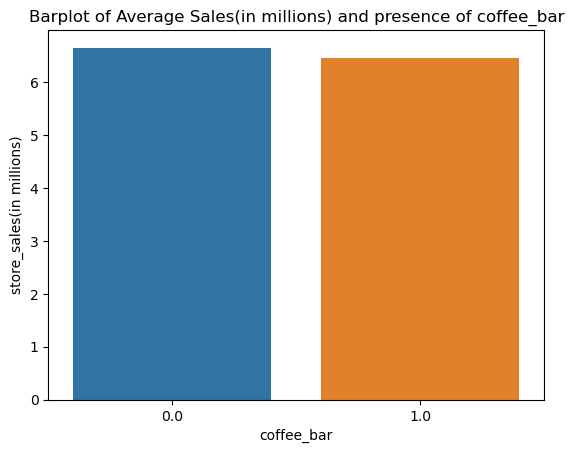

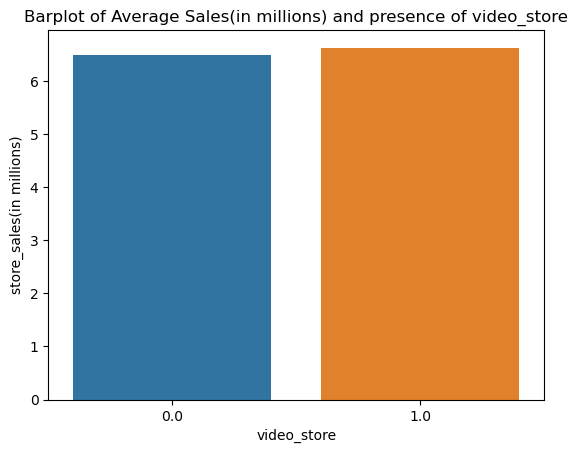

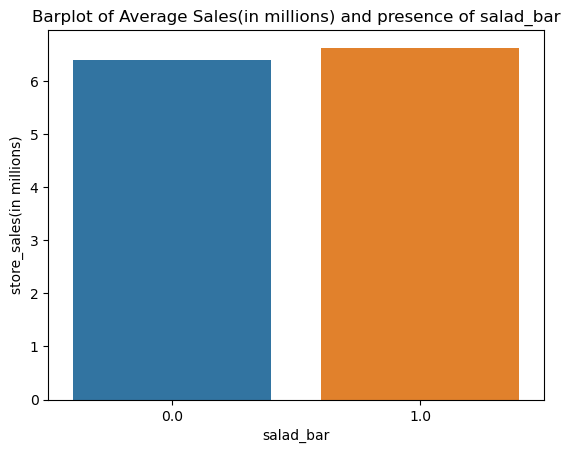

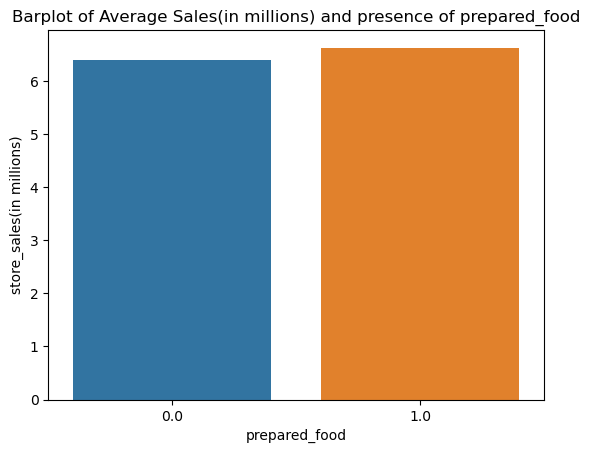

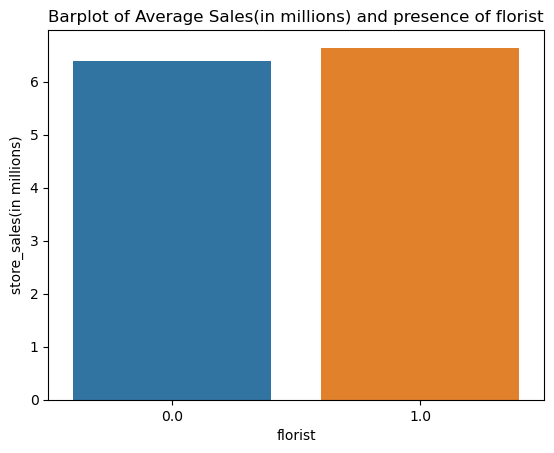

In [8]:
# cheking for presense of coffee bar and sales
facilities=['coffee_bar','video_store','salad_bar','prepared_food','florist']

for i in facilities:
    fac=pd.DataFrame(df.groupby(i)['store_sales(in millions)'].mean()).reset_index()
    sns.barplot(data=fac,x=fac.columns[0],y=fac.columns[1])
    plt.title(f'Barplot of Average Sales(in millions) and presence of {i}')
    plt.show()

Average Store Sales for stores without coffee bar is comparitively higher compared to the stores with one

Average Store Sales for stores with a video_store is comparitively higher compared to the stores without one

Average Store Sales for stores with a salad_bar is comparitively higher compared to the stores without one

Average Store Sales for stores with prepared_food is comparitively higher compared to the stores without one

Average Store Sales for stores with a florist is comparitively higher compared to the stores without one

<Axes: >

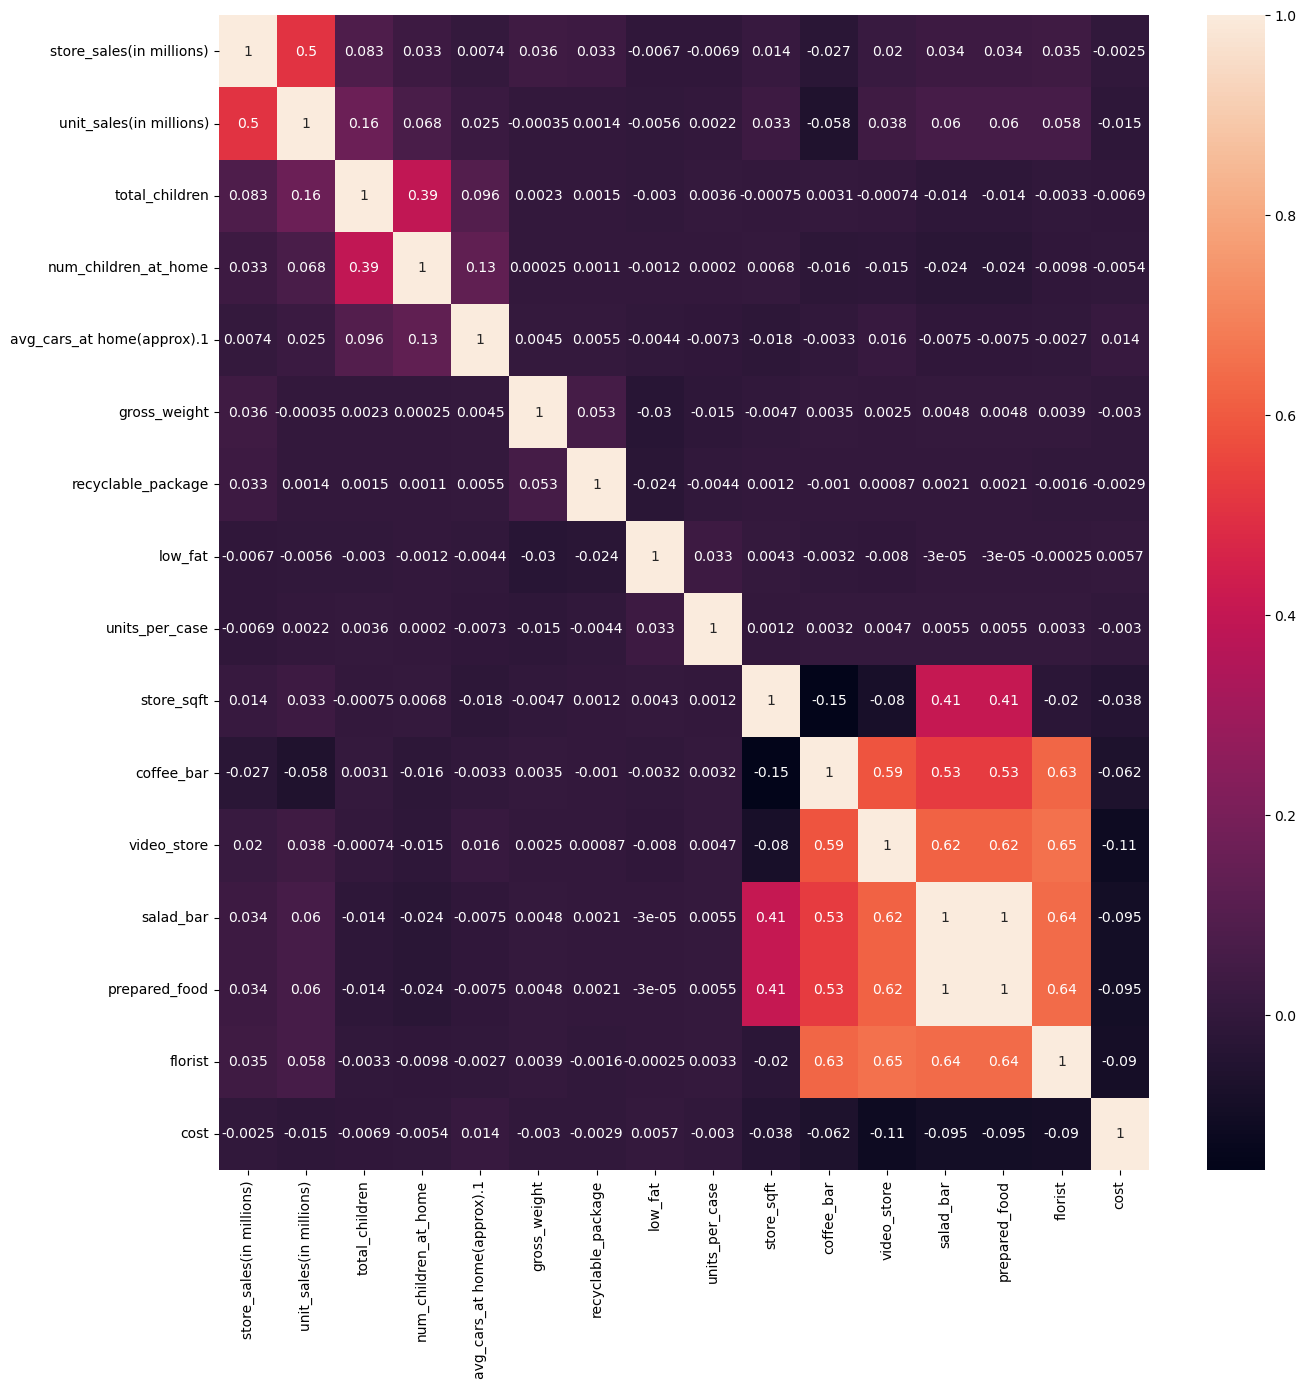

In [10]:
# heatmap showing correlations in the dataset.
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(),annot=True)

Most of the variables do not seem to have a strong correlation with one another.



## Machine Learning Models

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score,mean_squared_error

In [12]:
# splitting the data into train and test sets
y=df['cost']
x=df.drop('cost',axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# standardizing the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)




# Linear Regression

In [13]:
model_lm=LinearRegression()
model_lm.fit(x_train,y_train)

pred_lm=model_lm.predict(x_test)

In [35]:
pd.DataFrame({'Actual_Values':y_test,'Predicted_values':pred_lm})


,Actual_Values,Predicted_values
30252,147.18,102.413958
45198,54.11,94.741516
34417,137.77,104.179609
49635,55.59,93.504985
13052,91.28,104.875918
...,...,...
33429,84.16,94.853214
10487,110.56,92.684417
35964,146.72,94.536191
4312,101.84,100.577016


In [41]:
# model Evaluation metrics
r2_lm= r2_score(y_test,pred_lm)
print(f'R-sqaure is: {round(r2_lm,3)}')

rmse_lm=(mean_squared_error(y_test,pred_lm))**0.5
print(f'RMSE is : {round(rmse_lm,3)}')

R-sqaure is: 0.014
RMSE is : 29.795


The linear regression model has an out of sample (OOS) R-square score of 0.014 i.e, about 1.4% variation in the Cost(dependent variable) can be explained by the independent variables considered to build the model. In addition to a poor R-square score, the linear model has RMSE value of about 29.8 which is on the higher side.

Therefore, this linear regression model is a poor fit for the data and a bad model to predict Cost.

# Lasso Regression

In [16]:
# using grid search to find the best value for aplha
param_grid={'alpha':[0.01,0.1,1,10,15,20]}
las=Lasso()

grid_search= GridSearchCV(las,param_grid,cv=10,scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [17]:
# getting best parameters and model

param=grid_search.best_params_
b_model=grid_search.best_estimator_

print(param)
print(b_model)
print('In-sample RMSE:',(grid_search.best_score_ *-1)**0.5)


{'alpha': 0.01}
Lasso(alpha=0.01)
In-sample RMSE: 29.806907477997797


In [36]:
# Lasso regression with alpha=0.01
model_lasso=Lasso(alpha=0.01)
model_lasso.fit(x_train,y_train)

pred_lasso=model_lasso.predict(x_test)

pd.DataFrame({'Actual_Values':y_test,'Predicted_values':pred_lasso})


,Actual_Values,Predicted_values
30252,147.18,102.366317
45198,54.11,94.746803
34417,137.77,104.111216
49635,55.59,93.542356
13052,91.28,104.779159
...,...,...
33429,84.16,94.865444
10487,110.56,92.765452
35964,146.72,94.492613
4312,101.84,100.596133


In [19]:
# variables Lasso regression dropped

pd.DataFrame({'Variables':x.columns,'Co-eff_values':model_lasso.coef_})

,Variables,Co-eff_values
0,store_sales(in millions),0.046314
1,unit_sales(in millions),-0.157864
2,total_children,-0.277267
3,num_children_at_home,-0.105499
4,avg_cars_at home(approx).1,0.407329
5,gross_weight,-0.086244
6,recyclable_package,-0.150664
7,low_fat,0.222558
8,units_per_case,-0.000000
9,store_sqft,-1.269655


Lasso regression dropped the variables units_per_case and prepared_food

In [42]:
r2_lasso= r2_score(y_test,pred_lasso)
print(f'R-sqaure is: {round(r2_lasso,3)}')

rmse_lasso=(mean_squared_error(y_test,pred_lasso))**0.5
print(f'RMSE is : {round(rmse_lasso,3)}')

R-sqaure is: 0.014
RMSE is : 29.795


Lasso regresion model has an OOS RMSE value of about 29.8, indicating that the Lasso regression model is a poor fit to the data and a bad model to predict Cost.

# Random Forest

In [21]:
#using grid search to find best parameters
param_grid={
    'n_estimators':[100,250,500],
    'max_depth':[None,5,10,15],
    'min_samples_split':[10,15,20]
}

reg=RandomForestRegressor(random_state=1)
grid_search=GridSearchCV(reg,param_grid,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(x_train,y_train)

param=grid_search.best_params_
b_model=grid_search.best_estimator_

print(param)
print(b_model)
print('In-sample RMSE:',(grid_search.best_score_ *-1)**0.5)

{'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 500}
RandomForestRegressor(max_depth=10, min_samples_split=20, n_estimators=500,
                      random_state=1)
In-sample RMSE: 29.098343833456067


In [37]:
model_rf=RandomForestRegressor(n_estimators=500,max_depth=10,min_samples_split=20)
model_rf.fit(x_train,y_train)

pred_rf=model_rf.predict(x_test)


pd.DataFrame({'Actual_Values':y_test,'Predicted_values':pred_rf})



,Actual_Values,Predicted_values
30252,147.18,107.085838
45198,54.11,85.880276
34417,137.77,100.272973
49635,55.59,76.626520
13052,91.28,105.542627
...,...,...
33429,84.16,84.018927
10487,110.56,86.556065
35964,146.72,97.341266
4312,101.84,97.839057


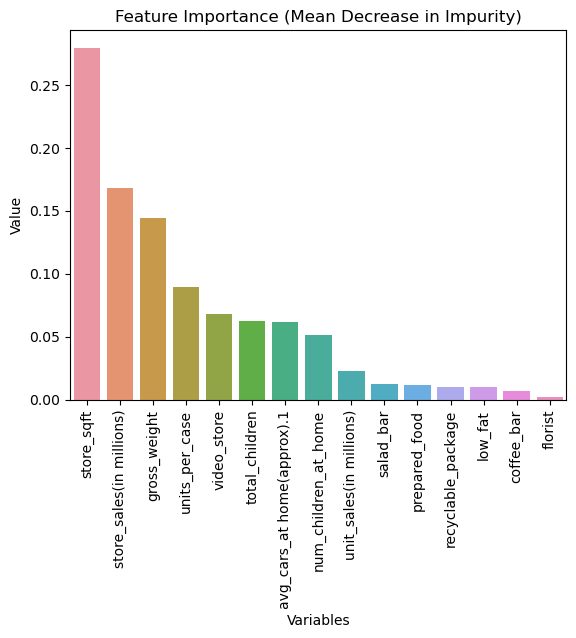

In [55]:
# feature importance

sns.barplot(data=pd.DataFrame({'Variables':x.columns,'Value':model_rf.feature_importances_}).sort_values('Value',ascending=False),x='Variables',y='Value')
plt.xticks(rotation=90)
plt.title('Feature Importance (Mean Decrease in Impurity)')
plt.show()



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'store_sqft'),
  Text(1, 0, 'video_store'),
  Text(2, 0, 'total_children'),
  Text(3, 0, 'avg_cars_at home(approx).1'),
  Text(4, 0, 'num_children_at_home'),
  Text(5, 0, 'gross_weight'),
  Text(6, 0, 'store_sales(in millions)'),
  Text(7, 0, 'prepared_food'),
  Text(8, 0, 'salad_bar'),
  Text(9, 0, 'coffee_bar'),
  Text(10, 0, 'unit_sales(in millions)'),
  Text(11, 0, 'florist'),
  Text(12, 0, 'units_per_case'),
  Text(13, 0, 'recyclable_package'),
  Text(14, 0, 'low_fat')])

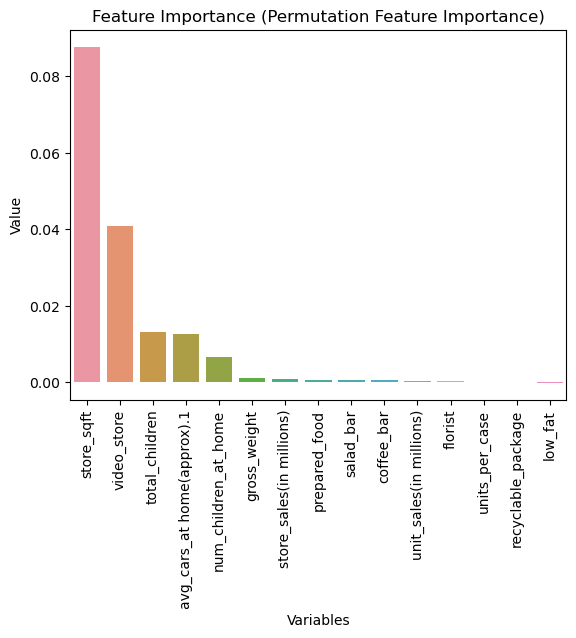

In [54]:
pfi=permutation_importance(model_rf,x_test,y_test)
sns.barplot(data=pd.DataFrame({'Variables':x.columns,'Value':pfi.importances_mean}).sort_values('Value',ascending=False),x='Variables',y='Value')
plt.title('Feature Importance (Permutation Feature Importance)')
plt.xticks(rotation=90)

Store Squarefeet and presence of a video store at retail outlets seem to common important feature given by Mean Decrease in Importance Method and Permutation Feature Importance method.

Total children, number of chiuldren at home and number of cars a customer owns are the other important feature according to Permutation Feature Importance.

In [43]:
# model evaluation 
rmse_rf=(mean_squared_error(y_test,pred_rf))**0.5
print(f'RMSE is : {round(rmse_rf,3)}')

RMSE is : 29.018


The Random Forest model has a lower RMSE value when compared to Linear Regression and Lasso Regression. Therefore this is a better model to predict Cost.

# Models Performance

In [70]:
pd.DataFrame({'Linear Regression':[rmse_lm],'Lasso Regression':[rmse_lasso],'Random Forest': [rmse_rf]},index=['RMSE values']).transpose()

,RMSE values
Linear Regression,29.795374
Lasso Regression,29.795478
Random Forest,29.017519
